
# Matter shell definition

This example demonstrates how matter shells are defined, and their angular power
spectra computed.

The the angular power spectra are saved here, so that they can be reused in
other examples without recomputing.


## Compute
Here we define the shells for these examples, and use CAMB to compute the
angular matter power spectra for the shell definitions.



In [1]:
import matplotlib.pyplot as plt
import numpy as np

import camb
from cosmology import Cosmology

import glass.ext.camb
import glass.shells

# cosmology for the simulation
h = 0.7
Oc = 0.25
Ob = 0.05

# basic parameters of the simulation
lmax = 1000

# set up CAMB parameters for matter angular power spectrum
pars = camb.set_params(
    H0=100 * h,
    omch2=Oc * h**2,
    ombh2=Ob * h**2,
    NonLinear=camb.model.NonLinear_both,
)

# get the cosmology from CAMB
cosmo = Cosmology.from_camb(pars)

# shells of 200 Mpc in comoving distance spacing
zgrid = glass.shells.distance_grid(cosmo, 0.0, 1.0, dx=200.0)

# triangular radial windows, equivalent to linear interpolation of n(z)
shells = glass.shells.linear_windows(zgrid)

# compute angular matter power spectra with CAMB
cls = glass.ext.camb.matter_cls(pars, lmax, shells)

## Plot
We can do a quick preview of the shell definition.

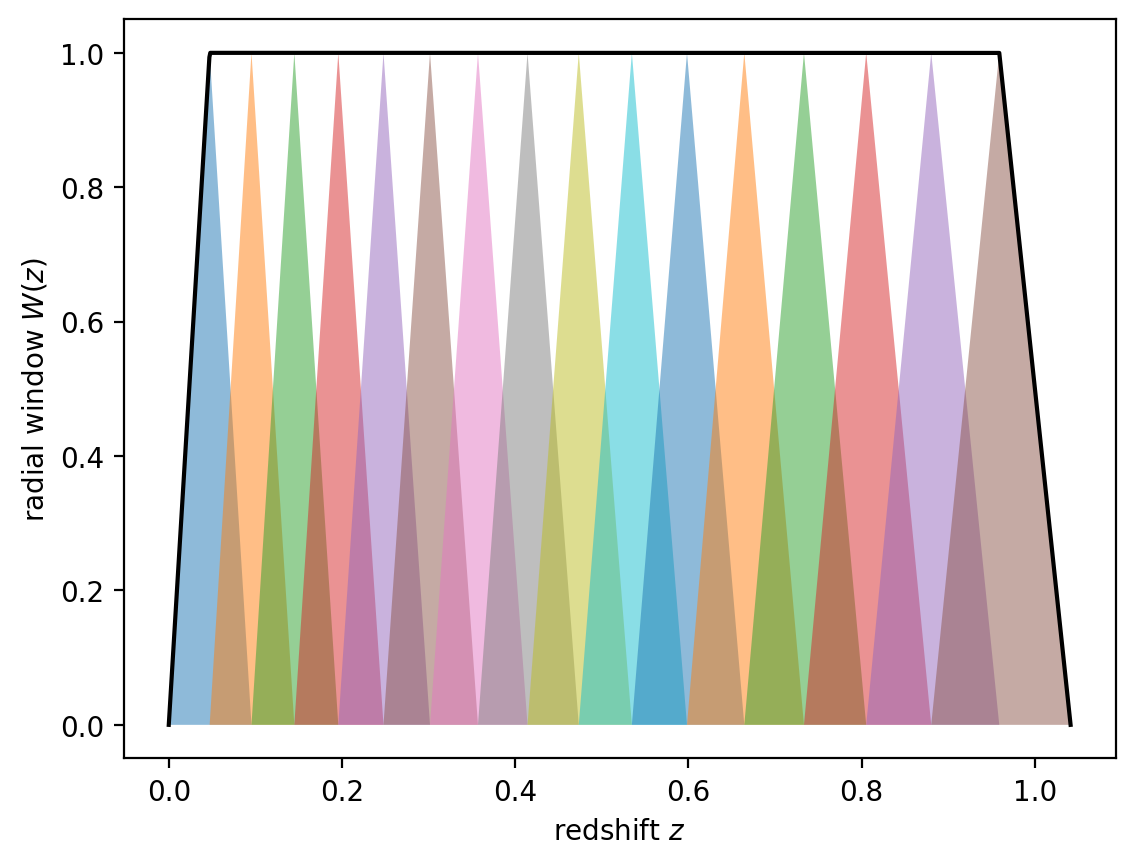

In [2]:
# plot the individual shells
for shell in shells:
    plt.fill_between(shell.za, np.zeros_like(shell.wa), shell.wa, alpha=0.5)

# plot the total of all shells
all_za = np.linspace(0.0, zgrid[-1], 1000)
all_wa = sum(np.interp(all_za, shell.za, shell.wa) for shell in shells)
plt.plot(all_za, all_wa, "-k")

plt.xlabel("redshift $z$")
plt.ylabel("radial window $W(z)$")
plt.show()

## Save
We save the shell definitions to file, for use in other examples.



In [3]:
np.save("cls.npy", cls)